# 🧪 Resume Matcher: Synthetic Data Exploration

This notebook loads and explores the synthetic resume-job dataset created for training and evaluation.

In [10]:
!pip install scikit-learn
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load synthetic data
df = pd.read_json("C:/Users/Pabs9/OneDrive/Desktop/Resumes ML Project/Low-Medium-Strong-Experiences.jsonl", lines=True)
df.head()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Pabs9\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,job_description,resume_text,match_label,missing_skills,suggestion_text
0,We are seeking a Data Analyst to join our FinT...,Operations Manager with 8 years in logistics. ...,low,"[SQL, Python, Power BI, Financial Modeling, Fi...",Consider learning SQL and data analytics tools...
1,We are seeking a Data Analyst to join our FinT...,Operations Manager with 8 years in logistics. ...,low,"[SQL, Python, Power BI, Financial Modeling, Fi...",Consider learning SQL and data analytics tools...
2,We are seeking a Data Analyst to join our FinT...,Data Analyst with 4+ years in FinTech. Expert ...,high,[],
3,We are seeking a Data Analyst to join our FinT...,Business Analyst with 3 years in e-commerce. F...,medium,"[Financial Modeling, FinTech Experience, Advan...",Consider showcasing any financial work and str...
4,We are seeking a Data Analyst to join our FinT...,Business Analyst with 3 years in e-commerce. F...,medium,"[Financial Modeling, FinTech Experience, Advan...",Consider showcasing any financial work and str...


## 🔍 Visualize Match Distribution


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Pabs9\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


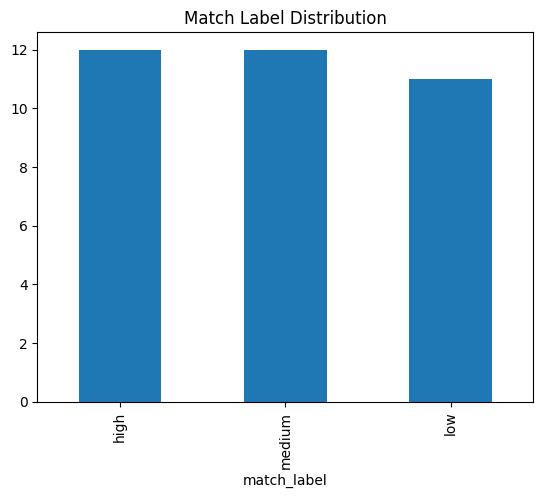

In [11]:
!pip install matplotlib
df['match_label'].value_counts().plot(kind='bar', title='Match Label Distribution');

## 🧠 Cosine Similarity (TF-IDF Baseline)

In [12]:
# Create a combined corpus
corpus = df['resume_text'].tolist() + df['job_description'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Split back into resumes and jobs
resumes_vec = X[:len(df)]
jobs_vec = X[len(df):]

# Compute cosine similarity
df['cosine_similarity'] = [cosine_similarity(resumes_vec[i], jobs_vec[i])[0][0] for i in range(len(df))]
df[['match_label', 'cosine_similarity']]

,match_label,cosine_similarity
0,low,0.173741
1,low,0.173741
2,high,0.235418
3,medium,0.232045
4,medium,0.232045
5,high,0.235418
6,low,0.173741
7,medium,0.232045
8,high,0.235418
9,medium,0.232045


## ✅ Summary Statistics

In [9]:
df.groupby('match_label')['cosine_similarity'].describe()

,count,mean,std,min,25%,50%,75%,max
match_label,,,,,,,,
high,1.0,0.332348,NaN,0.332348,0.332348,0.332348,0.332348,0.332348
low,1.0,0.144963,NaN,0.144963,0.144963,0.144963,0.144963,0.144963
medium,1.0,0.325426,NaN,0.325426,0.325426,0.325426,0.325426,0.325426
